# Welcome to my Notebook
# Airline Passenger Satisfaction Dataset

![](https://i.pinimg.com/originals/b9/b8/1a/b9b81ab0e549a0ef6bbd9616e32031d5.gif)

# About Dataset --> The dataset contains total of 22 input features, and our goal is to predict whether the Passengers are satisfied or not based on above features.

> Detail Description of input features are given below: 
1. Gender: male or female
2. Customer type: regular or non-regular airline customer
3. Age: the actual age of the passenger
4. Type of travel: the purpose of the passenger's flight (personal or business travel)
5. Class: business, economy, economy plus
6. Flight distance
7. Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not applicable; 1-5)
8. Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
9. Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
10. Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
11. Food and drink: food and drink satisfaction level (0: not rated; 1-5)
12. Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
13. Seat comfort: seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
16. Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
17. Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
18. Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
19. Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
20. Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
21. Departure delay in minutes
22. Arrival delay in minutes

> This data set contains a survey on air passenger satisfaction. The following classification problem is set:

> It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

1. Satisfaction
2. Neutral or dissatisfied


In [1]:
pip install "numpy>=1.16.5,<1.23.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.22.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.
Note: you may need to restart the k

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report


import warnings 
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read the training and testing data
train_data=pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test_data=pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [4]:
train_data.shape

(103904, 25)

In [5]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
# Lets drop the Unnamed:0 and Id column from the training data that has no impact on the target variable
train_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [7]:
# Lets check the shape of the train data again
train_data.shape

(103904, 23)

In [8]:
test_data.shape

(25976, 25)

In [9]:
# Lets drop the Unnamed:0 and Id column from the testing data that has no impact on the target variable
test_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [10]:
# Lets check the shape of the test data again
test_data.shape

(25976, 23)

In [11]:
# lets see the datatypes of ecah feature
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [12]:
# Lets describe the dataset into statistical form
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [13]:
# To check the duplicate values in the dataset
train_data.duplicated().sum()

0

In [14]:
# To check Is there any null values in training data
train_data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

> Here we notice that the feature Arrival Delay in Minutes has a 310 missing values.Lets handle these missing values.

In [15]:
# To check Is there any null values in testing data
test_data.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

> Here we notice that the feature Arrival Delay in Minutes has a 83 missing values.Lets handle these missing values.

# Handle the missing value using median of Arrival Delay in Minutes with the help of SimpleImputer

In [16]:
imputer=SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)
train_data["Arrival Delay in Minutes"]= imputer.fit_transform(train_data[["Arrival Delay in Minutes"]])
test_data["Arrival Delay in Minutes"]= imputer.fit_transform(test_data[["Arrival Delay in Minutes"]])

# Lets check the Dataset is balanced or not

In [17]:
train_data["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# Getting the List of Numerial and Categorical Features

In [18]:
def get_num_cat_columns(dataframe):
    categorical_cols=dataframe.select_dtypes(include="object").columns
    numerical_cols=dataframe.select_dtypes(exclude="object").columns
    
    return categorical_cols, numerical_cols

In [19]:
categorical_cols,numerical_cols=get_num_cat_columns(train_data)

In [20]:
categorical_cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [21]:
numerical_cols

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

# Exploratory Data Analysis

# Univariate Analysis

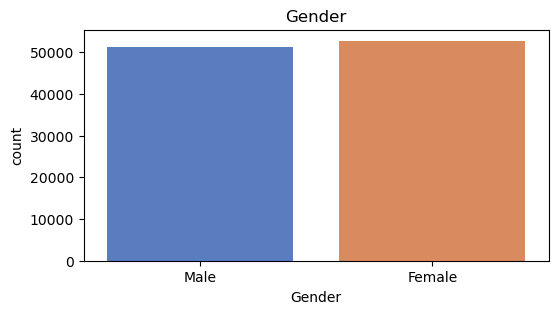

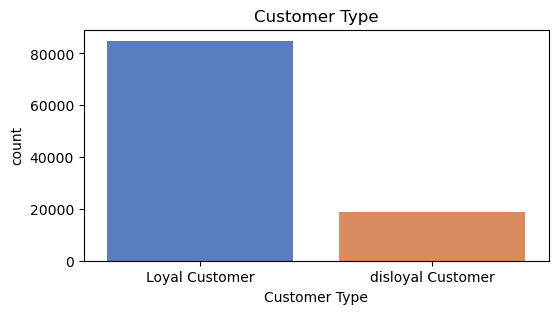

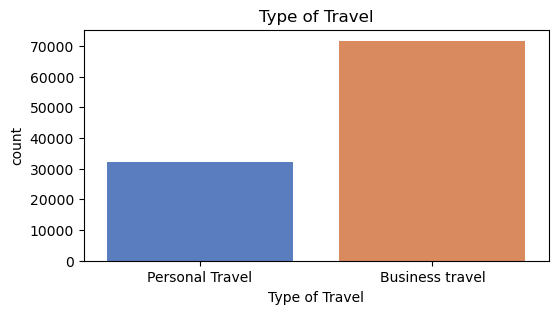

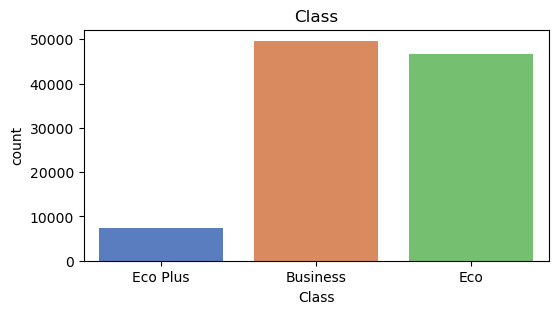

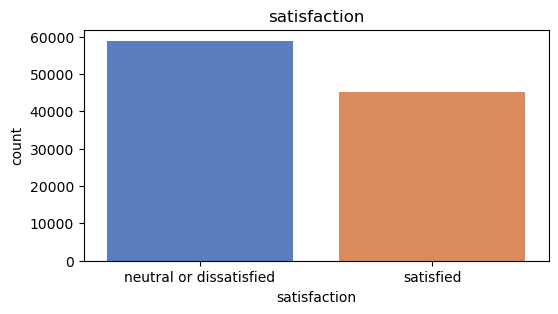

In [22]:
# Plot the countplot of categorical features
for col in categorical_cols:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(x=train_data[col], palette="muted")
    label=col
    plt.xlabel(label)
    plt.ylabel("count")
    plt.title(label)

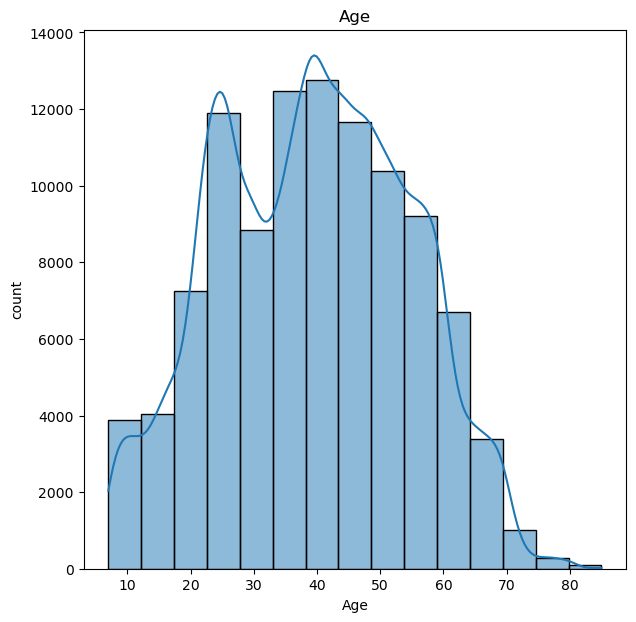

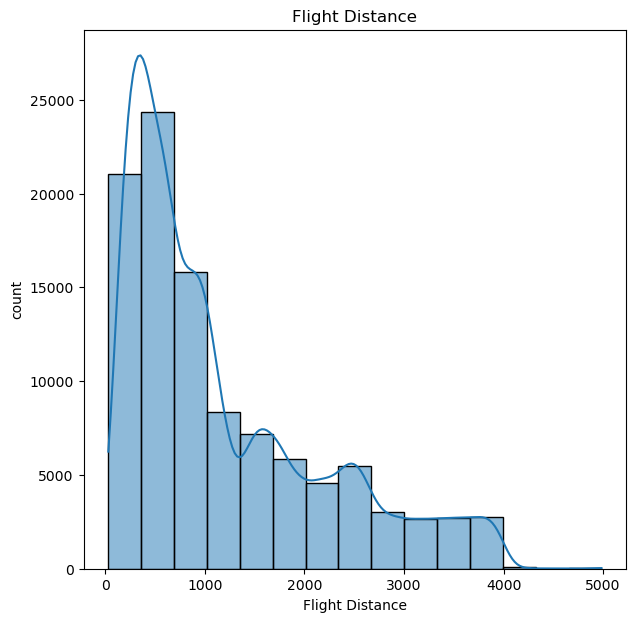

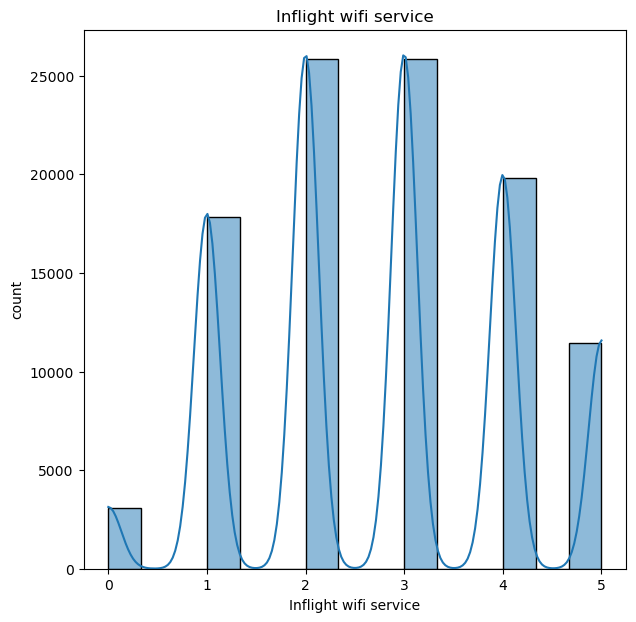

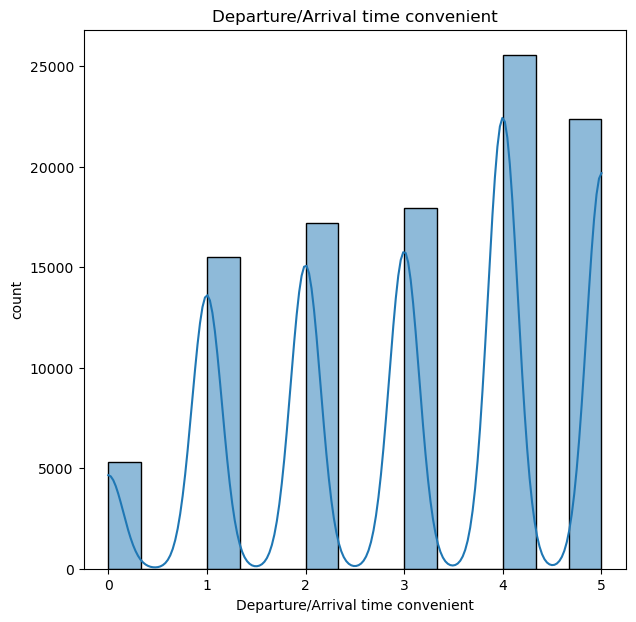

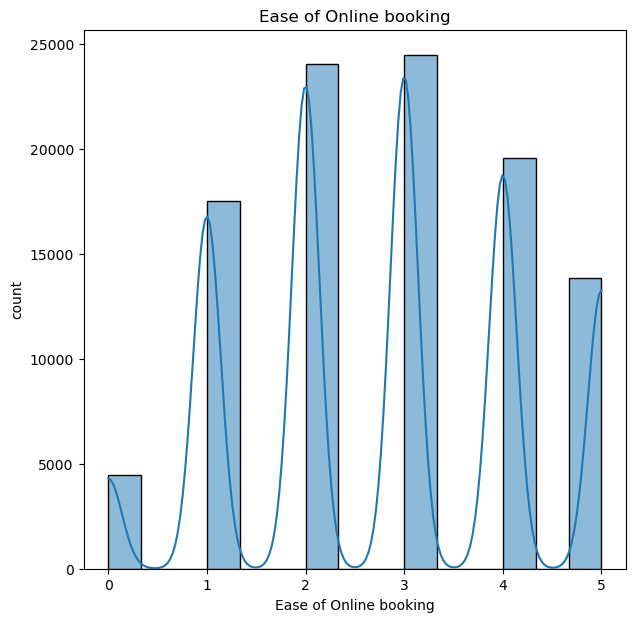

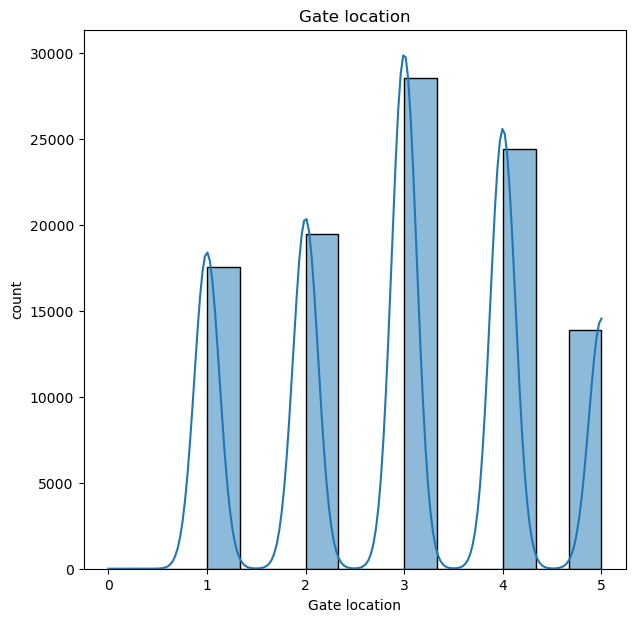

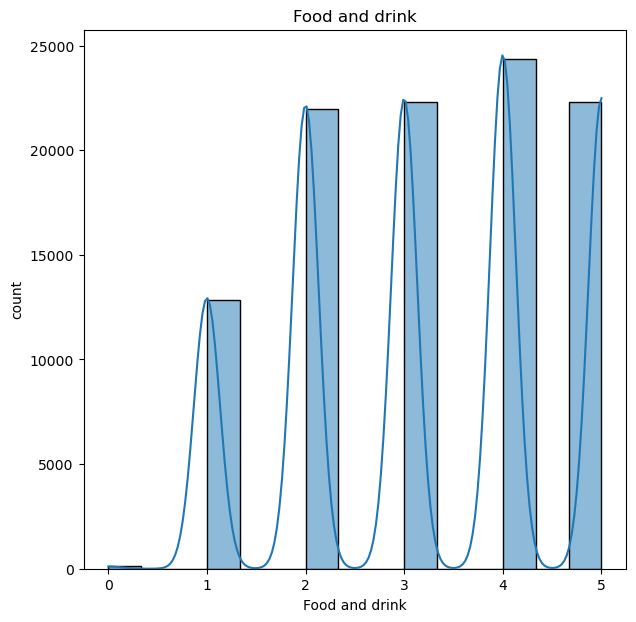

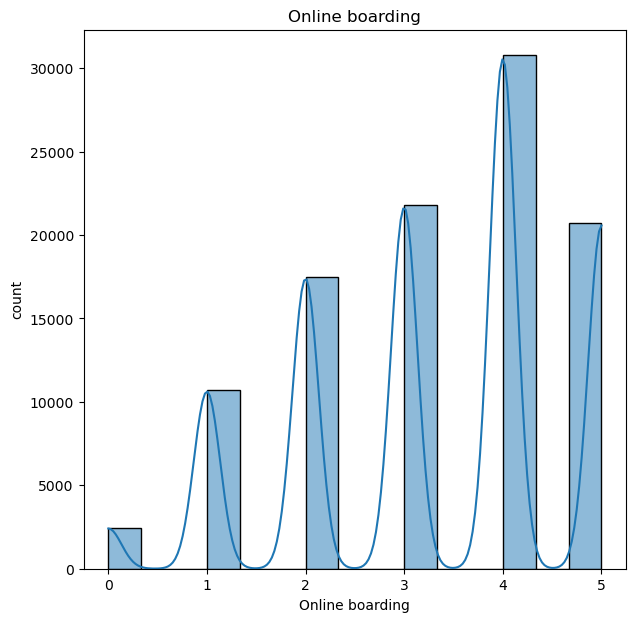

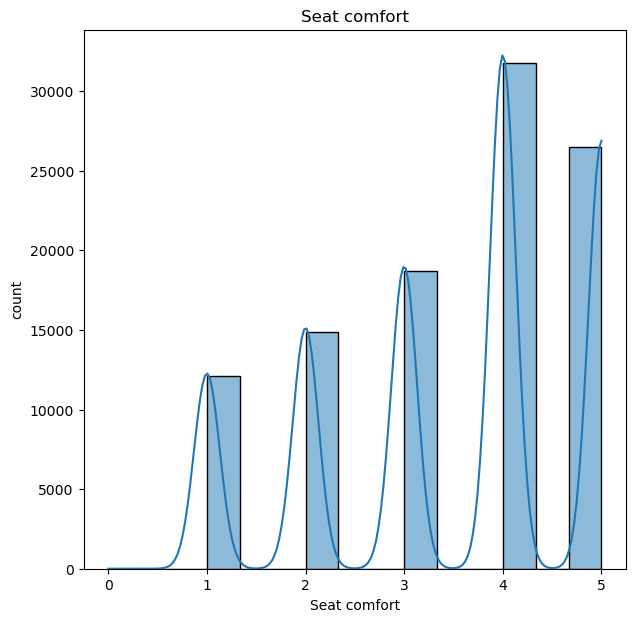

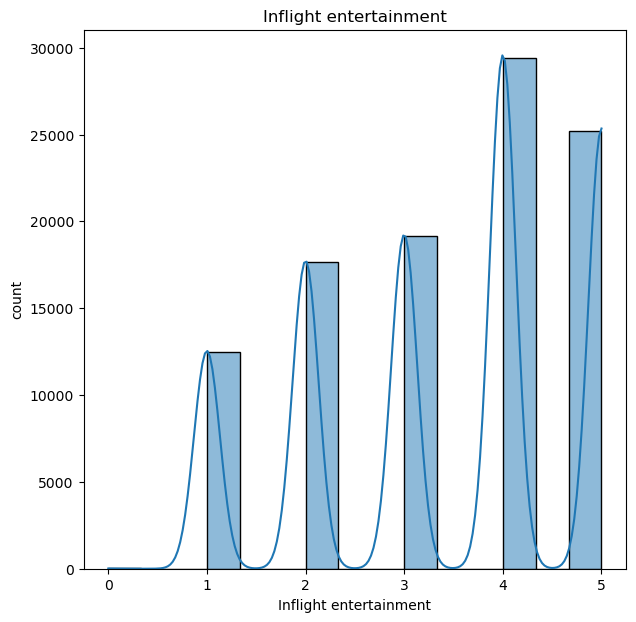

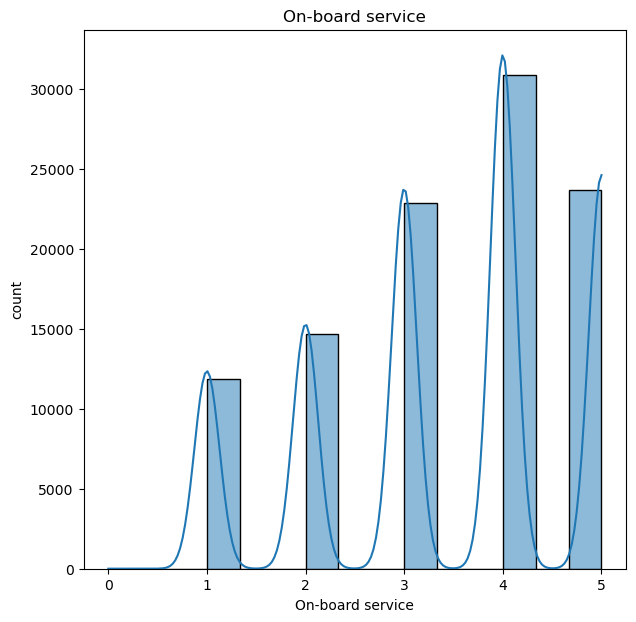

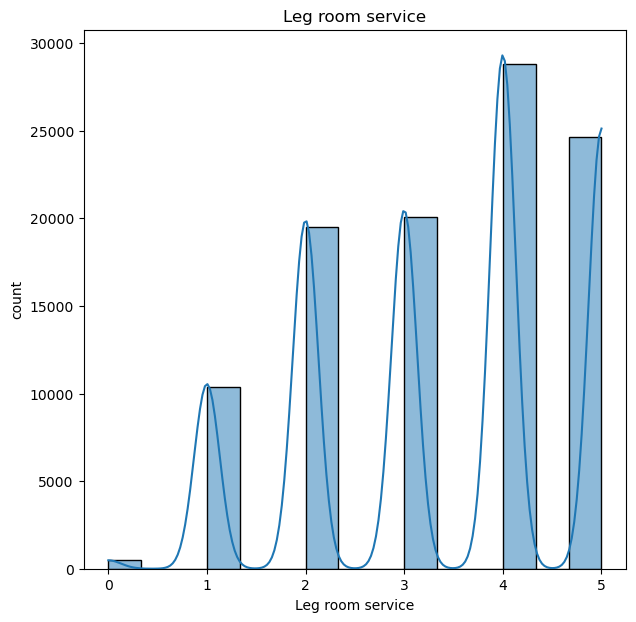

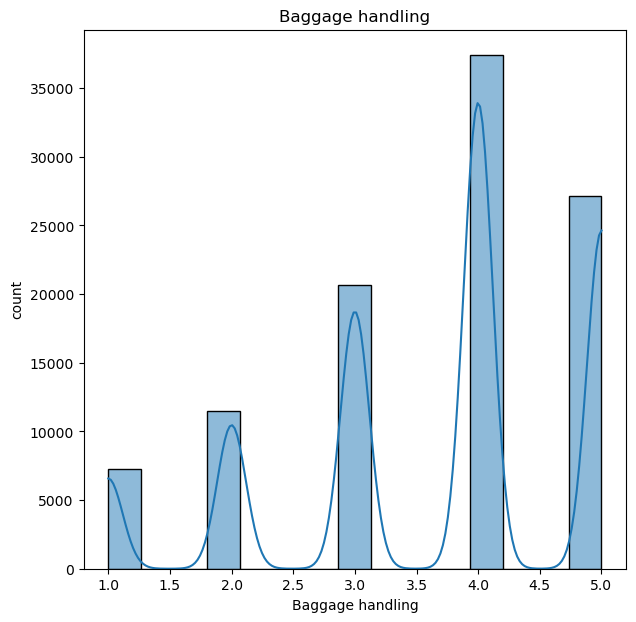

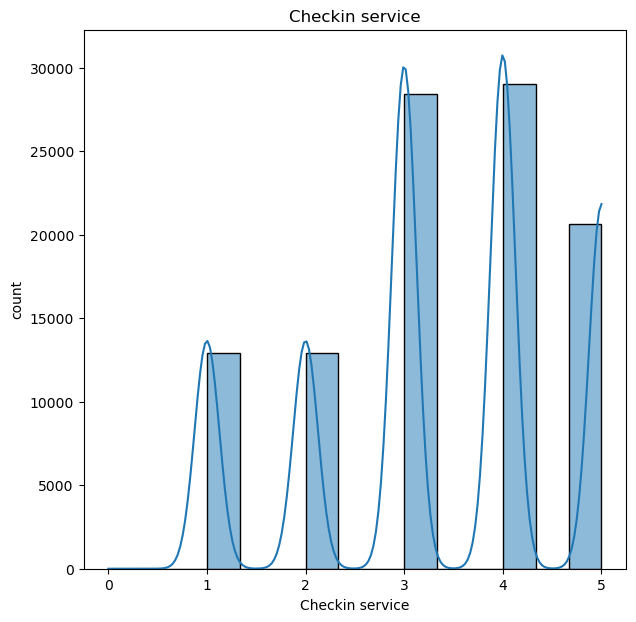

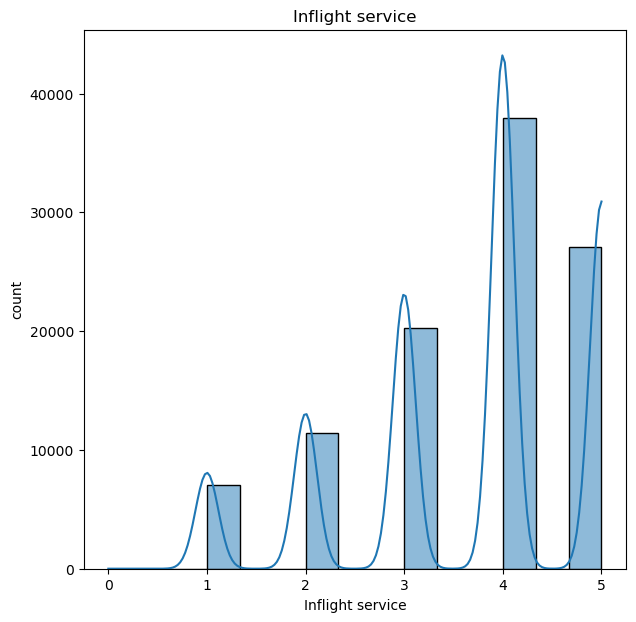

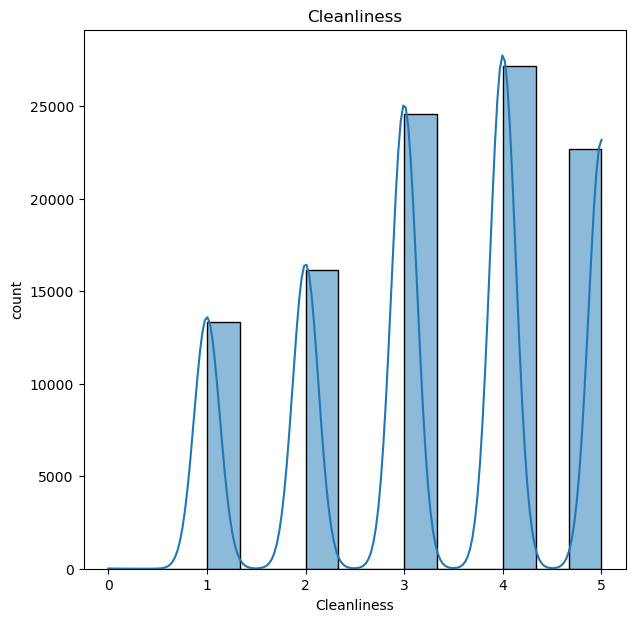

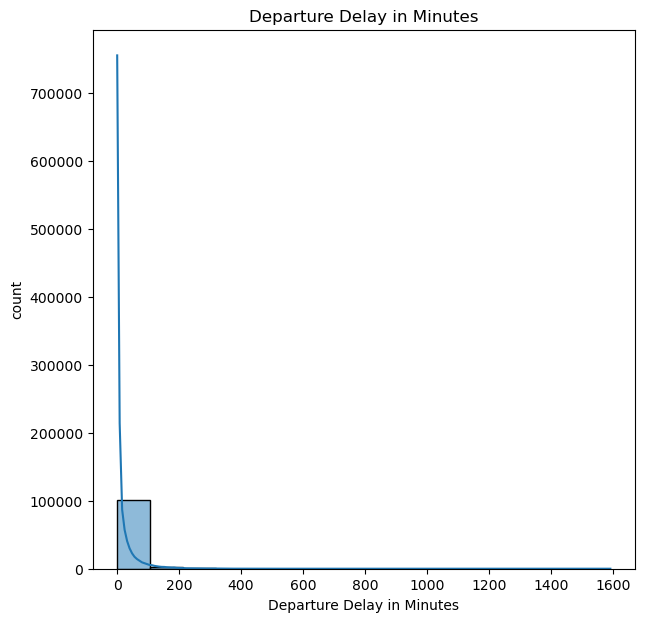

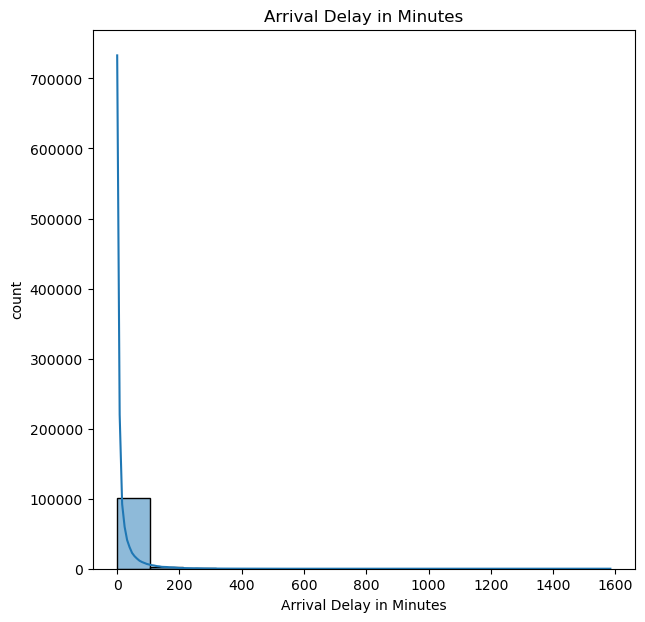

In [23]:
# Plot the data distribution of Numerical cols
for col in numerical_cols:
    plt.figure(figsize=(7,7))
    sns.histplot(train_data[col], palette="deep", kde=True, bins=15)
    label=col
    plt.xlabel(label)
    plt.ylabel("count")
    plt.title(label)

# Label Encoding -- Convert Categorical Features into Numerical Features

In [24]:
le= LabelEncoder()
train_data["Gender"]= le.fit_transform(train_data["Gender"])
train_data["Customer Type"]= le.fit_transform(train_data["Customer Type"])
train_data["Type of Travel"]= le.fit_transform(train_data["Type of Travel"])
train_data["Class"]= le.fit_transform(train_data["Class"])
train_data["satisfaction"]= le.fit_transform(train_data["satisfaction"])


# Lets make the Correlation Matrix

In [25]:
corr_matrix= train_data.corr()
corr_matrix

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,...,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000347,0.012211
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,...,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004815,-0.187638
Age,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,-0.001330,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167
Type of Travel,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,...,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005867,-0.449000
Class,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,-0.004488,...,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014554,-0.449321
Flight Distance,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,0.004793,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470,0.298780
Inflight wifi service,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,0.336248,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042,0.284245
Departure/Arrival time convenient,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,0.444757,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,-0.051601
Ease of Online booking,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,0.458655,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947,0.171705
Gate location,0.000333,0.006078,-0.001330,-0.030700,-0.004488,0.004793,0.336248,0.444757,0.458655,1.000000,...,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178,0.000682


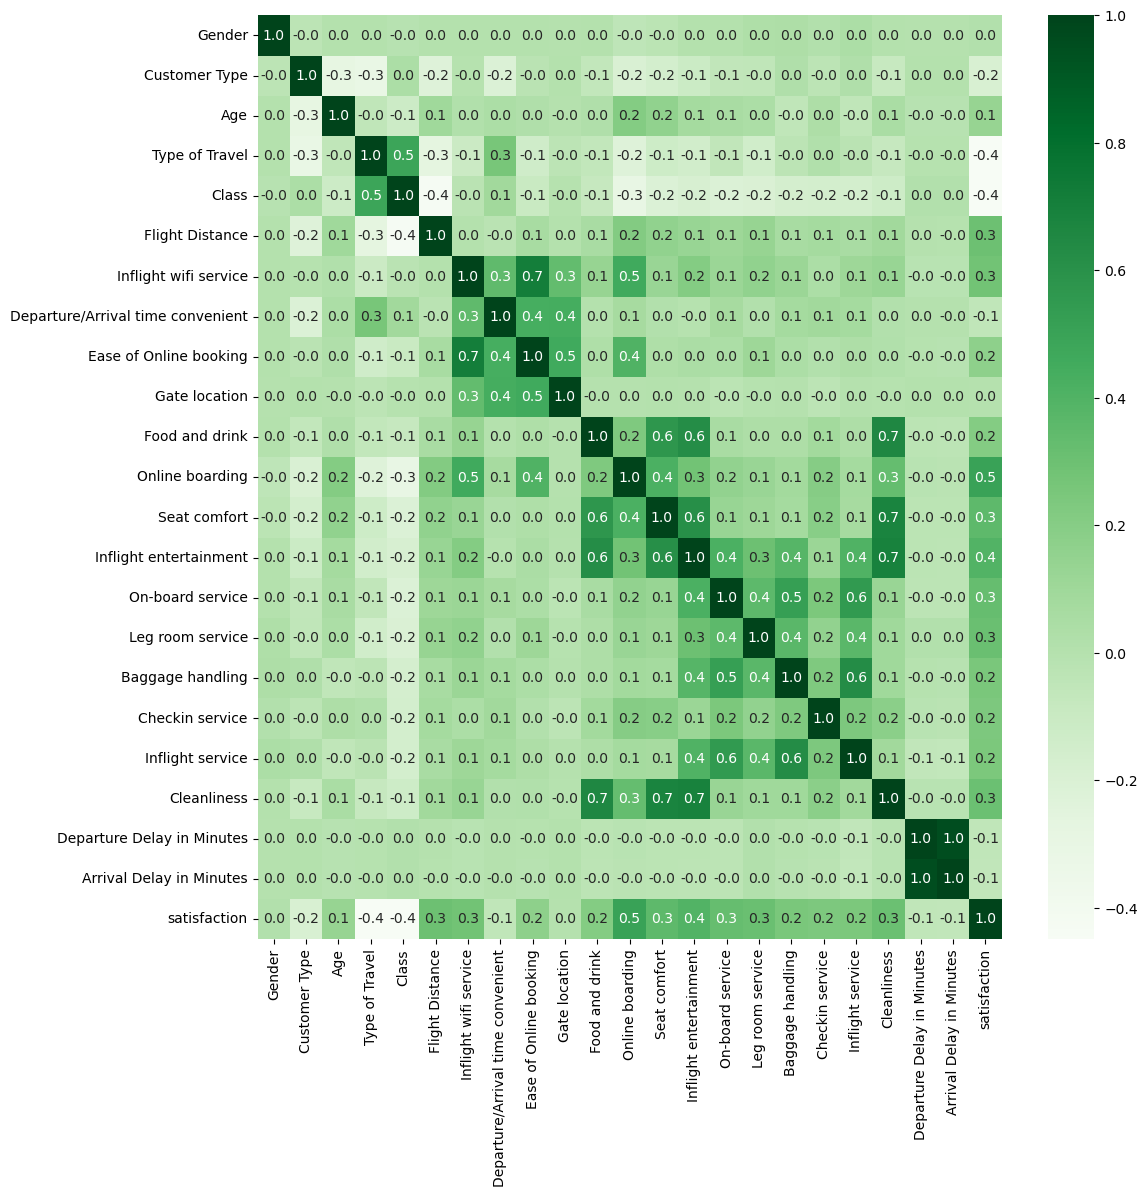

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".1f")
plt.show()

> Here we can see that Departure Delay in Minutes and Arrival Delay in Minutes has the correlation 1, it convey the information about the flight delay. So lets remove one of them from the dataset.

# Lets Perform the Bivariate Anaylsis

In [27]:
plt.figure(figsize=(10,10))
fig= px.box(train_data, x="satisfaction", y="Age", title="Age Vs Satisfaction", color="satisfaction")
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [28]:
plt.figure(figsize=(10,10))
fig = px.box(train_data, x="satisfaction", y="Flight Distance", title="Flight_Distance Vs Satisfaction", color="satisfaction")
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [29]:
plt.figure(figsize=(10,10))
fig = px.box(train_data, x="satisfaction", y="Departure Delay in Minutes", title="Departure Delay in Minutes Vs Satisfaction", color="satisfaction")
fig.show()

<Figure size 1000x1000 with 0 Axes>

# Lets read the Dataset again for Modelling 

In [30]:
# Read the training and testing data
train_data=pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test_data=pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [31]:
# Lets drop the Unnamed:0 and Id column from the training data that has no impact on the target variable
train_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [32]:
# Lets drop the Unnamed:0 and Id column from the testing data that has no impact on the target variable
test_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [33]:
train_data.shape, test_data.shape

((103904, 23), (25976, 23))

# Above we notice that Departure Delay in Minutes and Arrival Delay in Minutes has the correlation 1
> Lets drop one of them from the Dataset

In [34]:
train_data.drop("Arrival Delay in Minutes", axis=1, inplace=True)
test_data.drop("Arrival Delay in Minutes", axis=1, inplace=True)

# Divide the Dataset into Train and Test Set

In [35]:
x_train=train_data.drop(["satisfaction"], axis=1)
y_train=train_data["satisfaction"]
x_test=test_data.drop(["satisfaction"], axis=1)
y_test=test_data["satisfaction"]

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((103904, 21), (103904,), (25976, 21), (25976,))

# Lets Detect the Outliers in the Dataset

In [37]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)
        
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)
    
    
    
    return ratio, x_train, y_train

In [38]:
ratio, x_train, y_train= Winsorization_Method(x_train.select_dtypes(exclude="object").columns, x_train, y_train , a=1, b=99)

In [39]:
x_train.shape, y_train.shape

((99212, 21), (99212,))

In [40]:
print(f"Ratio of Outliers Detected in the dataset:{ratio}")

Ratio of Outliers Detected in the dataset:4.52


In [41]:
# getting categorical and numerical columns
categorical_cols, numerical_cols= get_num_cat_columns(x_train)

# Data Preprocessing

# Data Preprocessing for Training Data

In [42]:
# One-Hot encode non-numeric columns
ohe= OneHotEncoder(handle_unknown="ignore", sparse=False)
x_train_encoded=pd.DataFrame(ohe.fit_transform(x_train[categorical_cols]))
x_train_encoded.columns= ohe.get_feature_names_out(categorical_cols)

# Label Encode the target class
le= LabelEncoder()
y_train=le.fit_transform(y_train)

# Appply RobustScaler for feature scaling
scaler= RobustScaler()
x_train_scaled= pd.DataFrame(scaler.fit_transform(x_train[numerical_cols]))
x_train_scaled.columns=x_train.select_dtypes(exclude="object").columns

# Concatenate the encoded and scaled fetures
x_train_processed=pd.concat([x_train_encoded,x_train_scaled], axis=1)
x_train_processed

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.125000,...,0.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.5,1.0,2.083333
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.625000,...,0.0,-1.000000,-1.5,-1.5,0.5,-0.5,-2.0,0.0,-1.0,0.083333
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.583333,...,1.0,0.333333,0.5,0.0,-0.5,0.0,1.0,0.0,1.0,0.000000
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.625000,...,-0.5,-0.666667,-1.0,-1.0,0.5,-0.5,-2.0,0.0,-0.5,0.916667
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.875000,...,1.0,0.333333,-0.5,-0.5,0.0,0.0,0.0,-0.5,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99207,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.708333,...,-0.5,-0.666667,-1.0,-0.5,-1.5,0.0,-1.0,-0.5,-0.5,0.250000
99208,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.375000,...,0.5,0.333333,0.5,0.5,0.5,0.5,2.0,0.5,0.5,0.000000
99209,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.416667,...,-1.0,0.333333,0.0,-0.5,-1.0,0.0,2.0,0.5,0.5,0.583333
99210,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.750000,...,-1.0,-1.000000,-1.5,0.0,0.5,-1.5,2.0,0.0,-1.0,0.000000


# Data Preprocessing for Testing Data

In [43]:
# One-Hot encode non-numeric columns
x_test_encoded=pd.DataFrame(ohe.transform(x_test[categorical_cols]))
x_test_encoded.columns= ohe.get_feature_names_out(categorical_cols)

# Label Encode the target class
y_test=le.transform(y_test)

# Appply RobustScaler for feature scaling
x_test_scaled= pd.DataFrame(scaler.transform(x_test[numerical_cols]))
x_test_scaled.columns=x_test.select_dtypes(exclude="object").columns

# Concatenate the encoded and scaled fetures
x_test_processed=pd.concat([x_test_encoded,x_test_scaled], axis=1)
x_test_processed

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.500000,...,0.5,-0.333333,0.5,0.5,0.5,0.5,-1.0,0.5,1.0,4.166667
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.166667,...,0.5,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.833333,...,-0.5,-0.666667,-1.0,0.0,-1.5,-0.5,-1.0,-1.0,-0.5,0.000000
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.166667,...,0.5,0.000000,-1.5,-1.5,-1.5,-1.5,0.0,-1.5,0.5,0.000000
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.375000,...,-1.0,-0.666667,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.250000,...,0.0,0.000000,0.0,-0.5,-1.0,0.0,1.0,0.5,0.5,0.000000
25972,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.708333,...,0.5,0.000000,0.0,0.0,0.5,0.5,2.0,0.5,0.5,0.000000
25973,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.958333,...,-1.0,-0.666667,-1.0,0.0,-0.5,0.0,2.0,0.0,-0.5,0.000000
25974,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.083333,...,0.5,0.000000,0.0,-0.5,-1.0,0.5,1.0,0.5,0.5,0.000000


# Lets do the Modelling

In [44]:
def modelling(x_train, x_test, y_train, y_test):
    
    cv_result = []
    best_estimators = []
    recall_scores = []
    precision_scores = []
    roc_auc_scores = []
    f1_scores = []
    
    
    
    dt=DecisionTreeClassifier(random_state=42)
    rf=RandomForestClassifier(random_state=42)
    classifiers=[dt, rf]

    dt_param_grid = {"min_samples_split" : range(10,500,20),
                     "max_depth": range(1,20,2)}


    rf_param_grid = {"max_features": [1,3,10],
                     "min_samples_split":[2,3,10],
                     "min_samples_leaf":[1,3,10],
                     "n_estimators":[100,300],
                     "criterion":["gini"]}
    

   

    classifier_parameters = [dt_param_grid,
                            rf_param_grid
                             ]
    
    for i in range(len(classifiers)):
        model= GridSearchCV(classifiers[i], classifier_parameters[i], cv=5, scoring ="accuracy", n_jobs = -1)
        model.fit(x_train, y_train)
        y_pred= model.predict(x_test)
        
        cv_result.append(model.best_score_)
        roc_auc_scores.append(roc_auc_score(y_pred, y_test))
        recall_scores.append(recall_score(y_pred, y_test))
        precision_scores.append(precision_score(y_pred, y_test))
        f1_scores.append(f1_score(y_pred, y_test))
        best_estimators.append(model.best_estimator_)
        
        
        print(f"Model:{classifiers[i]}")
        print(f"Accuracy:{round(cv_result[i]*100,2)}")
        print(f"ROC AUC:{roc_auc_scores[i]}")
        print(f"Recall:{recall_scores[i]}")
        print(f"Precision:{precision_scores[i]}")
        print(f"F1-Score:{f1_scores[i]}")
        print(f"Best Estimator:{model.best_estimator_}")
        print("Classifiaction Reoprt")
        print("---------------------")
        print(classification_report(y_test,y_pred,digits=3))
        print("Confusion_Matrix")
        print("---------------------")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
    
    
        print("---------------------------------------------------------------------------------------------------------------")

                         
                         
    model_names = ['DecisionTreeClassifier','RandomForestClassifier']
    result_df = pd.DataFrame({'Recall':recall_scores, 'Precision':precision_scores, 'F1_Score':f1_scores,'AUC_Score':roc_auc_scores, 'Accuracy': cv_result,},index=model_names)
    result_df=result_df.sort_values(by="AUC_Score", ascending=False)
    return result_df


Model:DecisionTreeClassifier(random_state=42)
Accuracy:95.47
ROC AUC:0.9560147544807853
Recall:0.9633218619815251
Precision:0.9328246952556345
F1-Score:0.9478280240588105
Best Estimator:DecisionTreeClassifier(max_depth=17, min_samples_split=30, random_state=42)
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.949     0.972     0.960     14573
           1      0.963     0.933     0.948     11403

    accuracy                          0.955     25976
   macro avg      0.956     0.953     0.954     25976
weighted avg      0.955     0.955     0.955     25976

Confusion_Matrix
---------------------


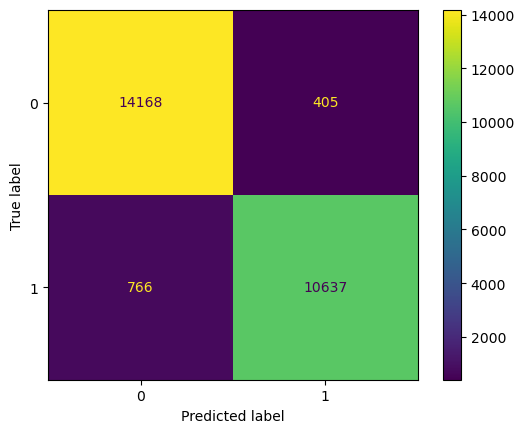

---------------------------------------------------------------------------------------------------------------
Model:RandomForestClassifier(random_state=42)
Accuracy:96.45
ROC AUC:0.9658344473997748
Recall:0.9735368497109826
Precision:0.9452775585372271
F1-Score:0.9591991101223581
Best Estimator:RandomForestClassifier(max_features=10, min_samples_split=10, n_estimators=300,
                       random_state=42)
Classifiaction Reoprt
---------------------
              precision    recall  f1-score   support

           0      0.958     0.980     0.969     14573
           1      0.974     0.945     0.959     11403

    accuracy                          0.965     25976
   macro avg      0.966     0.963     0.964     25976
weighted avg      0.965     0.965     0.965     25976

Confusion_Matrix
---------------------


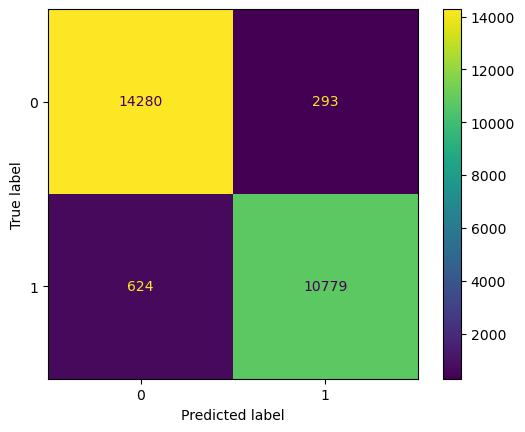

---------------------------------------------------------------------------------------------------------------


In [45]:
result_df= modelling(x_train_processed, x_test_processed, y_train, y_test)

In [46]:
result_df

,Recall,Precision,F1_Score,AUC_Score,Accuracy
RandomForestClassifier,0.973537,0.945278,0.959199,0.965834,0.964490
DecisionTreeClassifier,0.963322,0.932825,0.947828,0.956015,0.954713


# Result Comparison

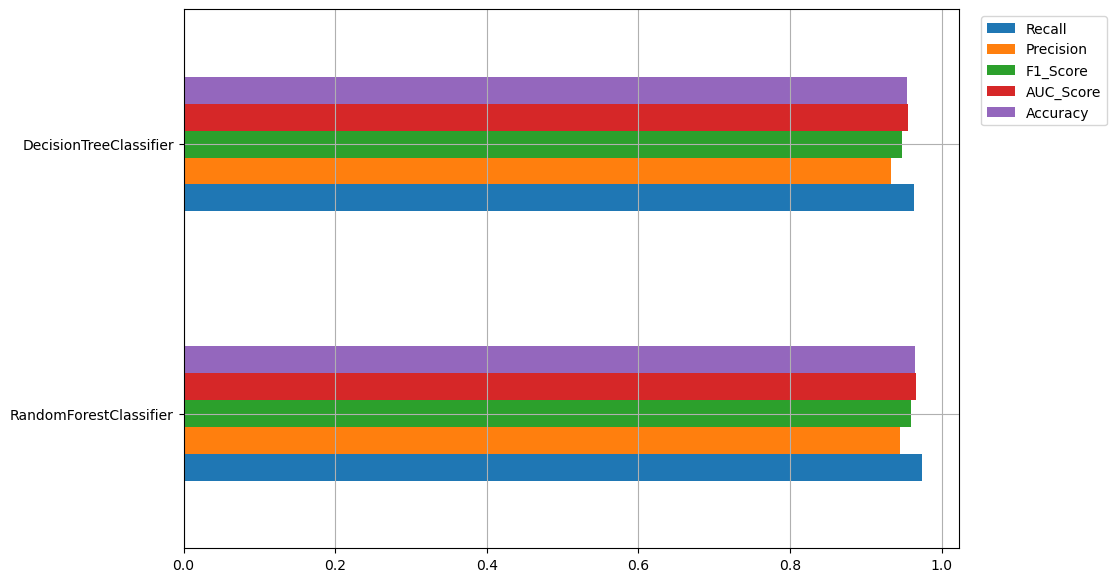

In [47]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2,1));

# Feature Importance 

In [48]:
rf= RandomForestClassifier().fit(x_train_processed,y_train)
importances=rf.feature_importances_
feature_names = [f"feature {i}" for i in range(x_train.shape[1])]

for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.05:
        print(f"{x_train_processed.columns[i]} : {round(rf.feature_importances_[i],3)}")

Type of Travel_Business travel : 0.066
Type of Travel_Personal Travel : 0.054
Class_Business : 0.063
Inflight wifi service : 0.134
Online boarding : 0.176
Inflight entertainment : 0.06


# Visualise the Decision Tree with max_depth=3
> (The plot_tree returns annotations for the plot, to not show them in the notebook I assigned returned value to underscore)

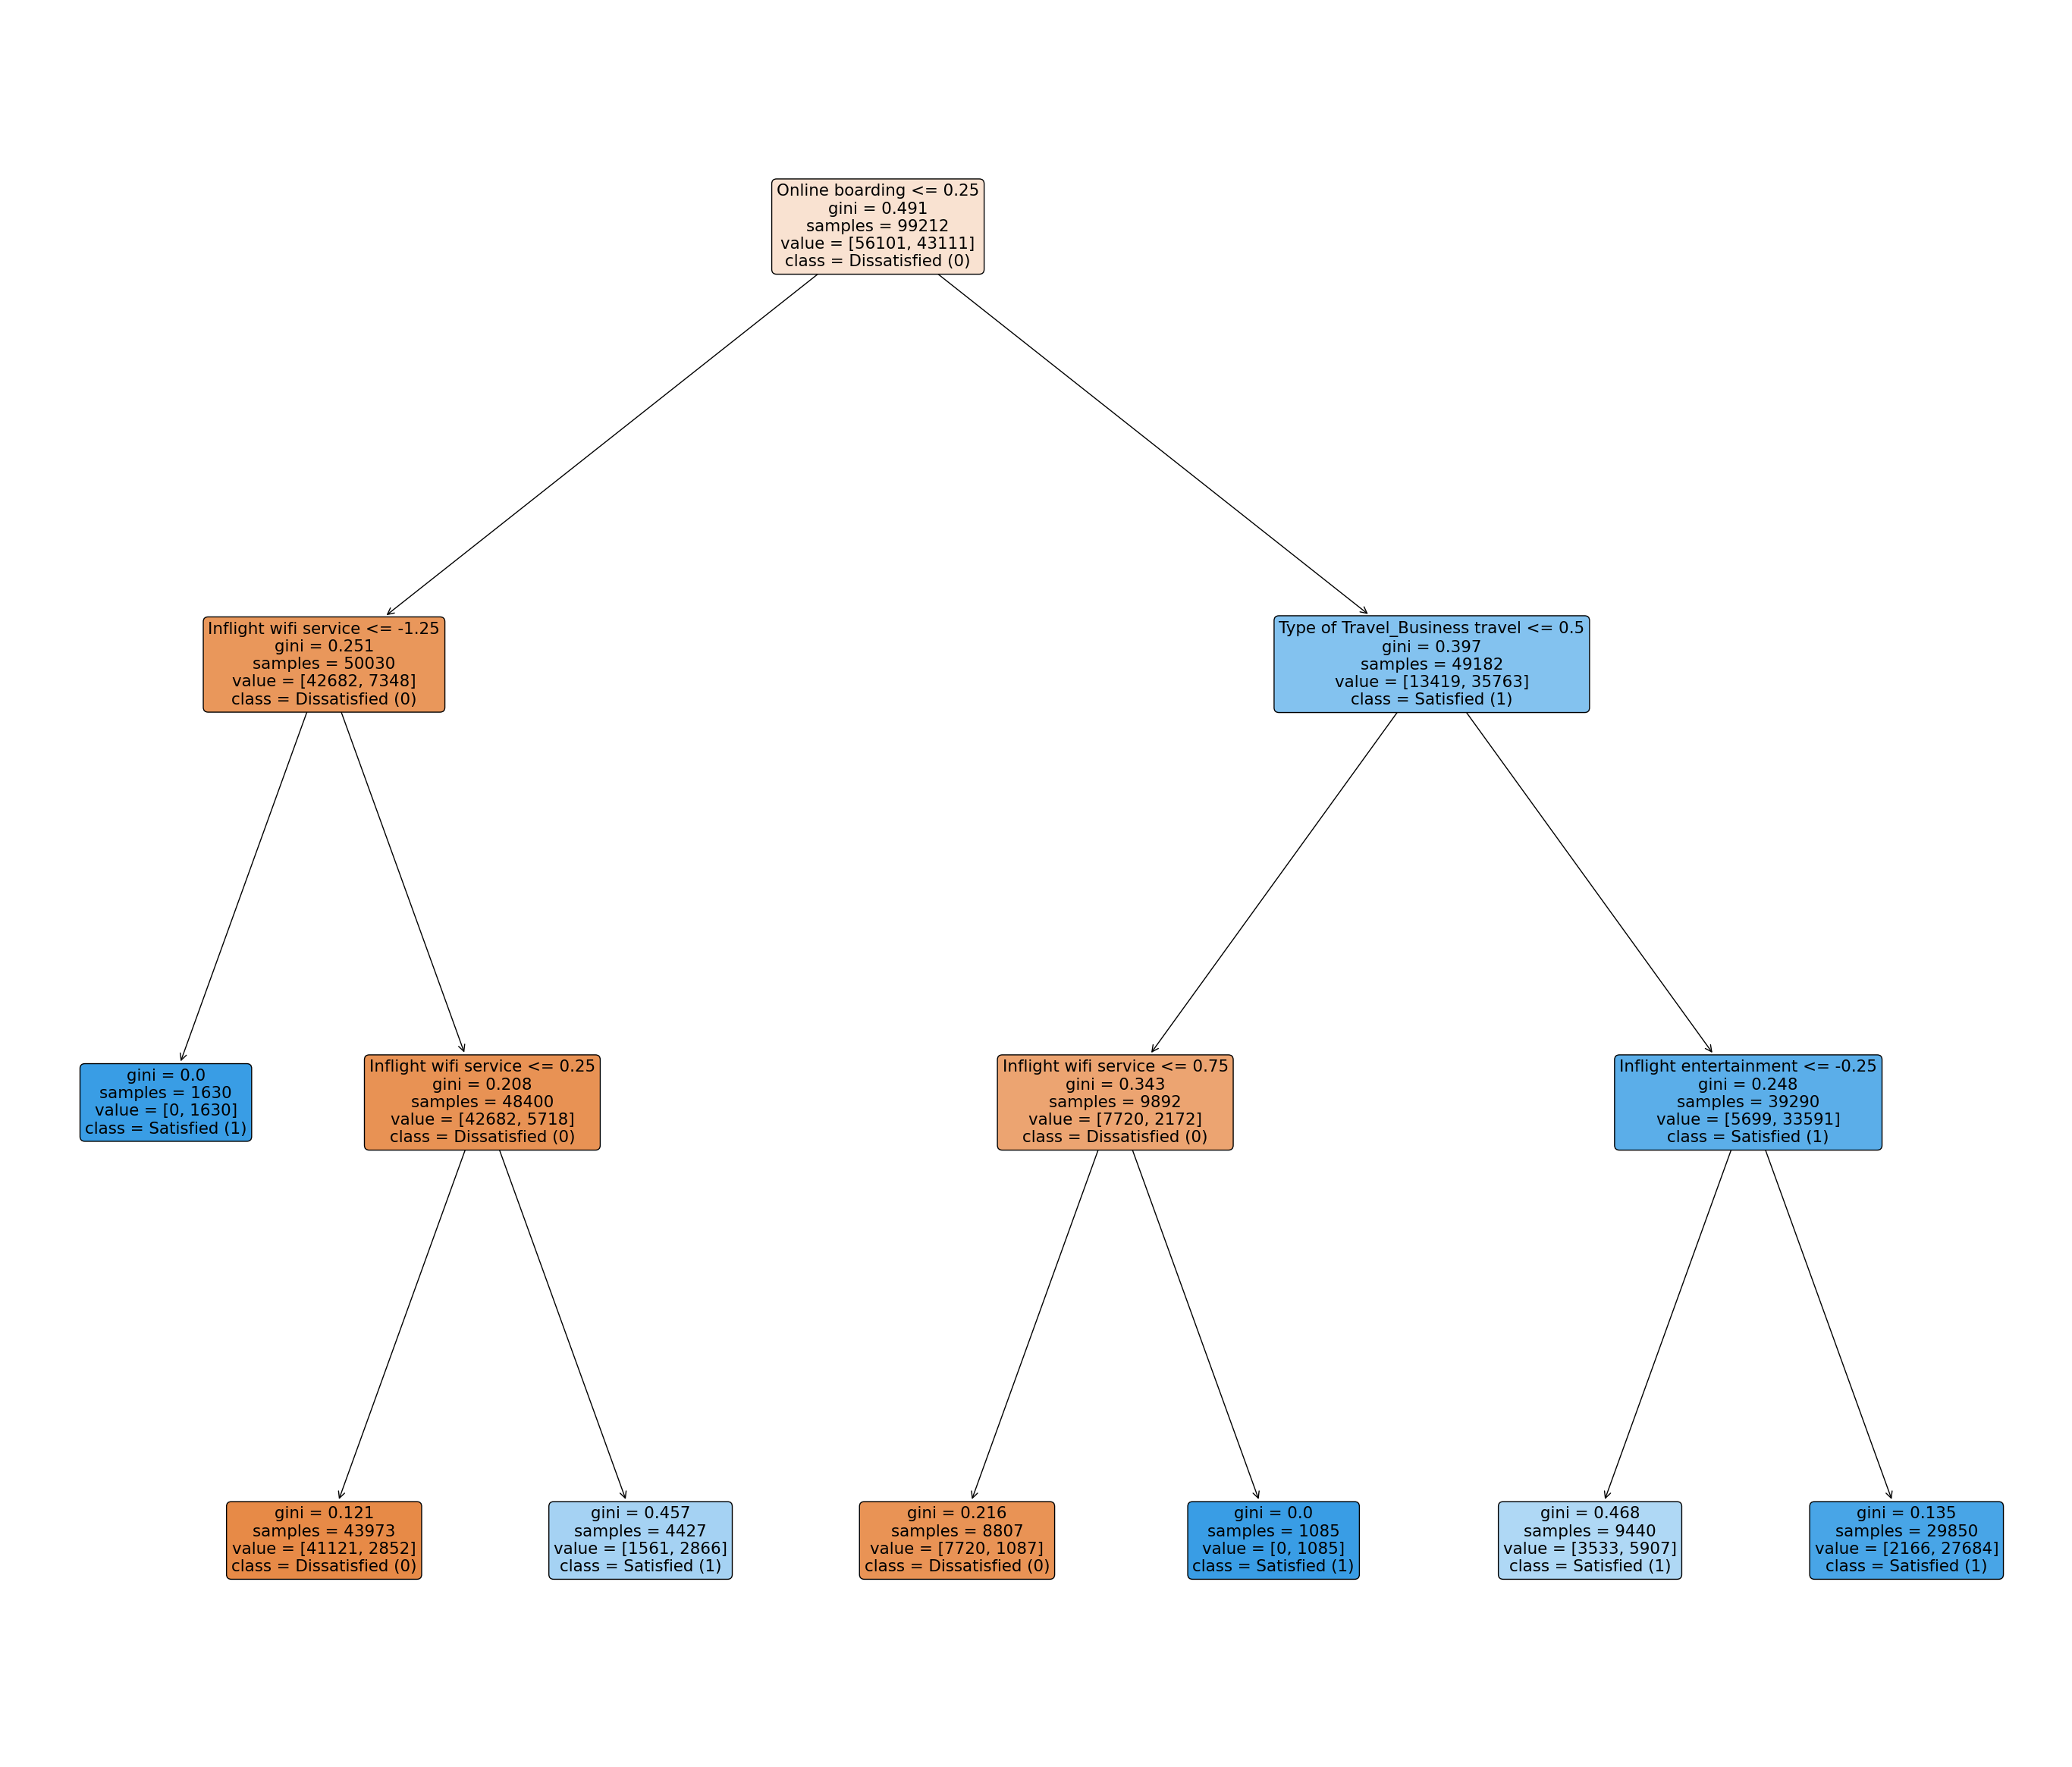

In [49]:
plt.figure(figsize=(35,30))
_= plot_tree(DecisionTreeClassifier(max_depth=3).fit(x_train_processed,y_train),feature_names=x_train_processed.columns, class_names=['Dissatisfied (0)','Satisfied (1)'], 
                                    label='all', filled=True, rounded=True)


# Conclusion
1. Here we can see that RandomForestclassifier perform best in terms of **Recall that is 0.97** with the help of best estimators that are max_features=10, min_samples_split=10, n_estimators=300.

2. After that we explore the feature importance with RandomForestclassifier,whose importance value is greater than 0.05 and we noticed that the following features have more impact on the target variable:
* Type of Travel_Business travel
* Type of Travel_Personal Travel 
* Class_Business
* Inflight wifi service
* Online boarding 
* Inflight entertainment 

3. We also visualize how decision tree made, here we only select the max_depth=3, for easy interpretation.

**Huge thanks** for your upvote on my Kaggle notebook! Your appreciation fuels my passion. I welcome any suggestions you might have—your insights are immensely valuable. Let's keep growing and improving together in the world of data science.

![](https://gifdb.com/images/high/thank-you-cute-hamster-holding-card-a6zrrnjabk559ndi.webp)